<a href="https://colab.research.google.com/github/saragamilmohamed/Wind-Speed-Prediction/blob/main/wind_speed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
## sklearn -- metrics
from sklearn.metrics import mean_squared_error, r2_score

## sklearn -- Models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

## Xgboost
from xgboost import XGBRegressor
## Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


In [ ]:
df=pd.read_csv("wind_dataset.csv")
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [ ]:
df.isna().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In [ ]:
df.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


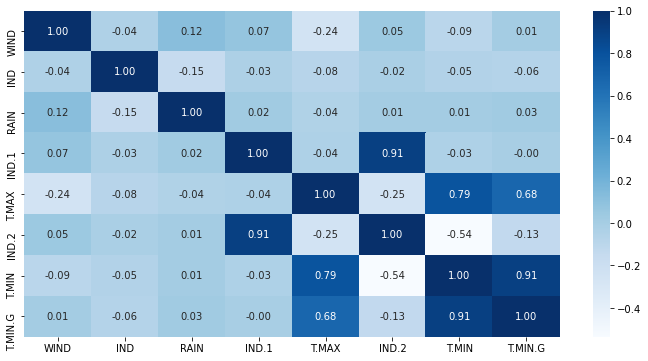

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt='.2f')  ## symmetric matrix
plt.show()

In [ ]:
df['DATE']=pd.to_datetime(df['DATE'])

In [ ]:
df['date_year']=df['DATE'].dt.year  #year
df['date_month_no']=df['DATE'].dt.month  #month
df['date_day']=df['DATE'].dt.day  # day
df=df.drop(columns=['DATE'])
df.head()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,date_year,date_month_no,date_day
0,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1961,1,1
1,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1961,1,2
2,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1961,1,3
3,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1961,1,4
4,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1961,1,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   WIND           6574 non-null   float64
 1   IND            6574 non-null   int64  
 2   RAIN           6574 non-null   float64
 3   IND.1          6513 non-null   float64
 4   T.MAX          5953 non-null   float64
 5   IND.2          6513 non-null   float64
 6   T.MIN          5900 non-null   float64
 7   T.MIN.G        6214 non-null   float64
 8   date_year      6574 non-null   int64  
 9   date_month_no  6574 non-null   int64  
 10  date_day       6574 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 565.1 KB


In [ ]:
df.isna().sum()

WIND               0
IND                0
RAIN               0
IND.1             61
T.MAX            621
IND.2             61
T.MIN            674
T.MIN.G          360
date_year          0
date_month_no      0
date_day           0
dtype: int64

In [ ]:
df.fillna(0, inplace=True)
df.isna().sum()

WIND             0
IND              0
RAIN             0
IND.1            0
T.MAX            0
IND.2            0
T.MIN            0
T.MIN.G          0
date_year        0
date_month_no    0
date_day         0
dtype: int64

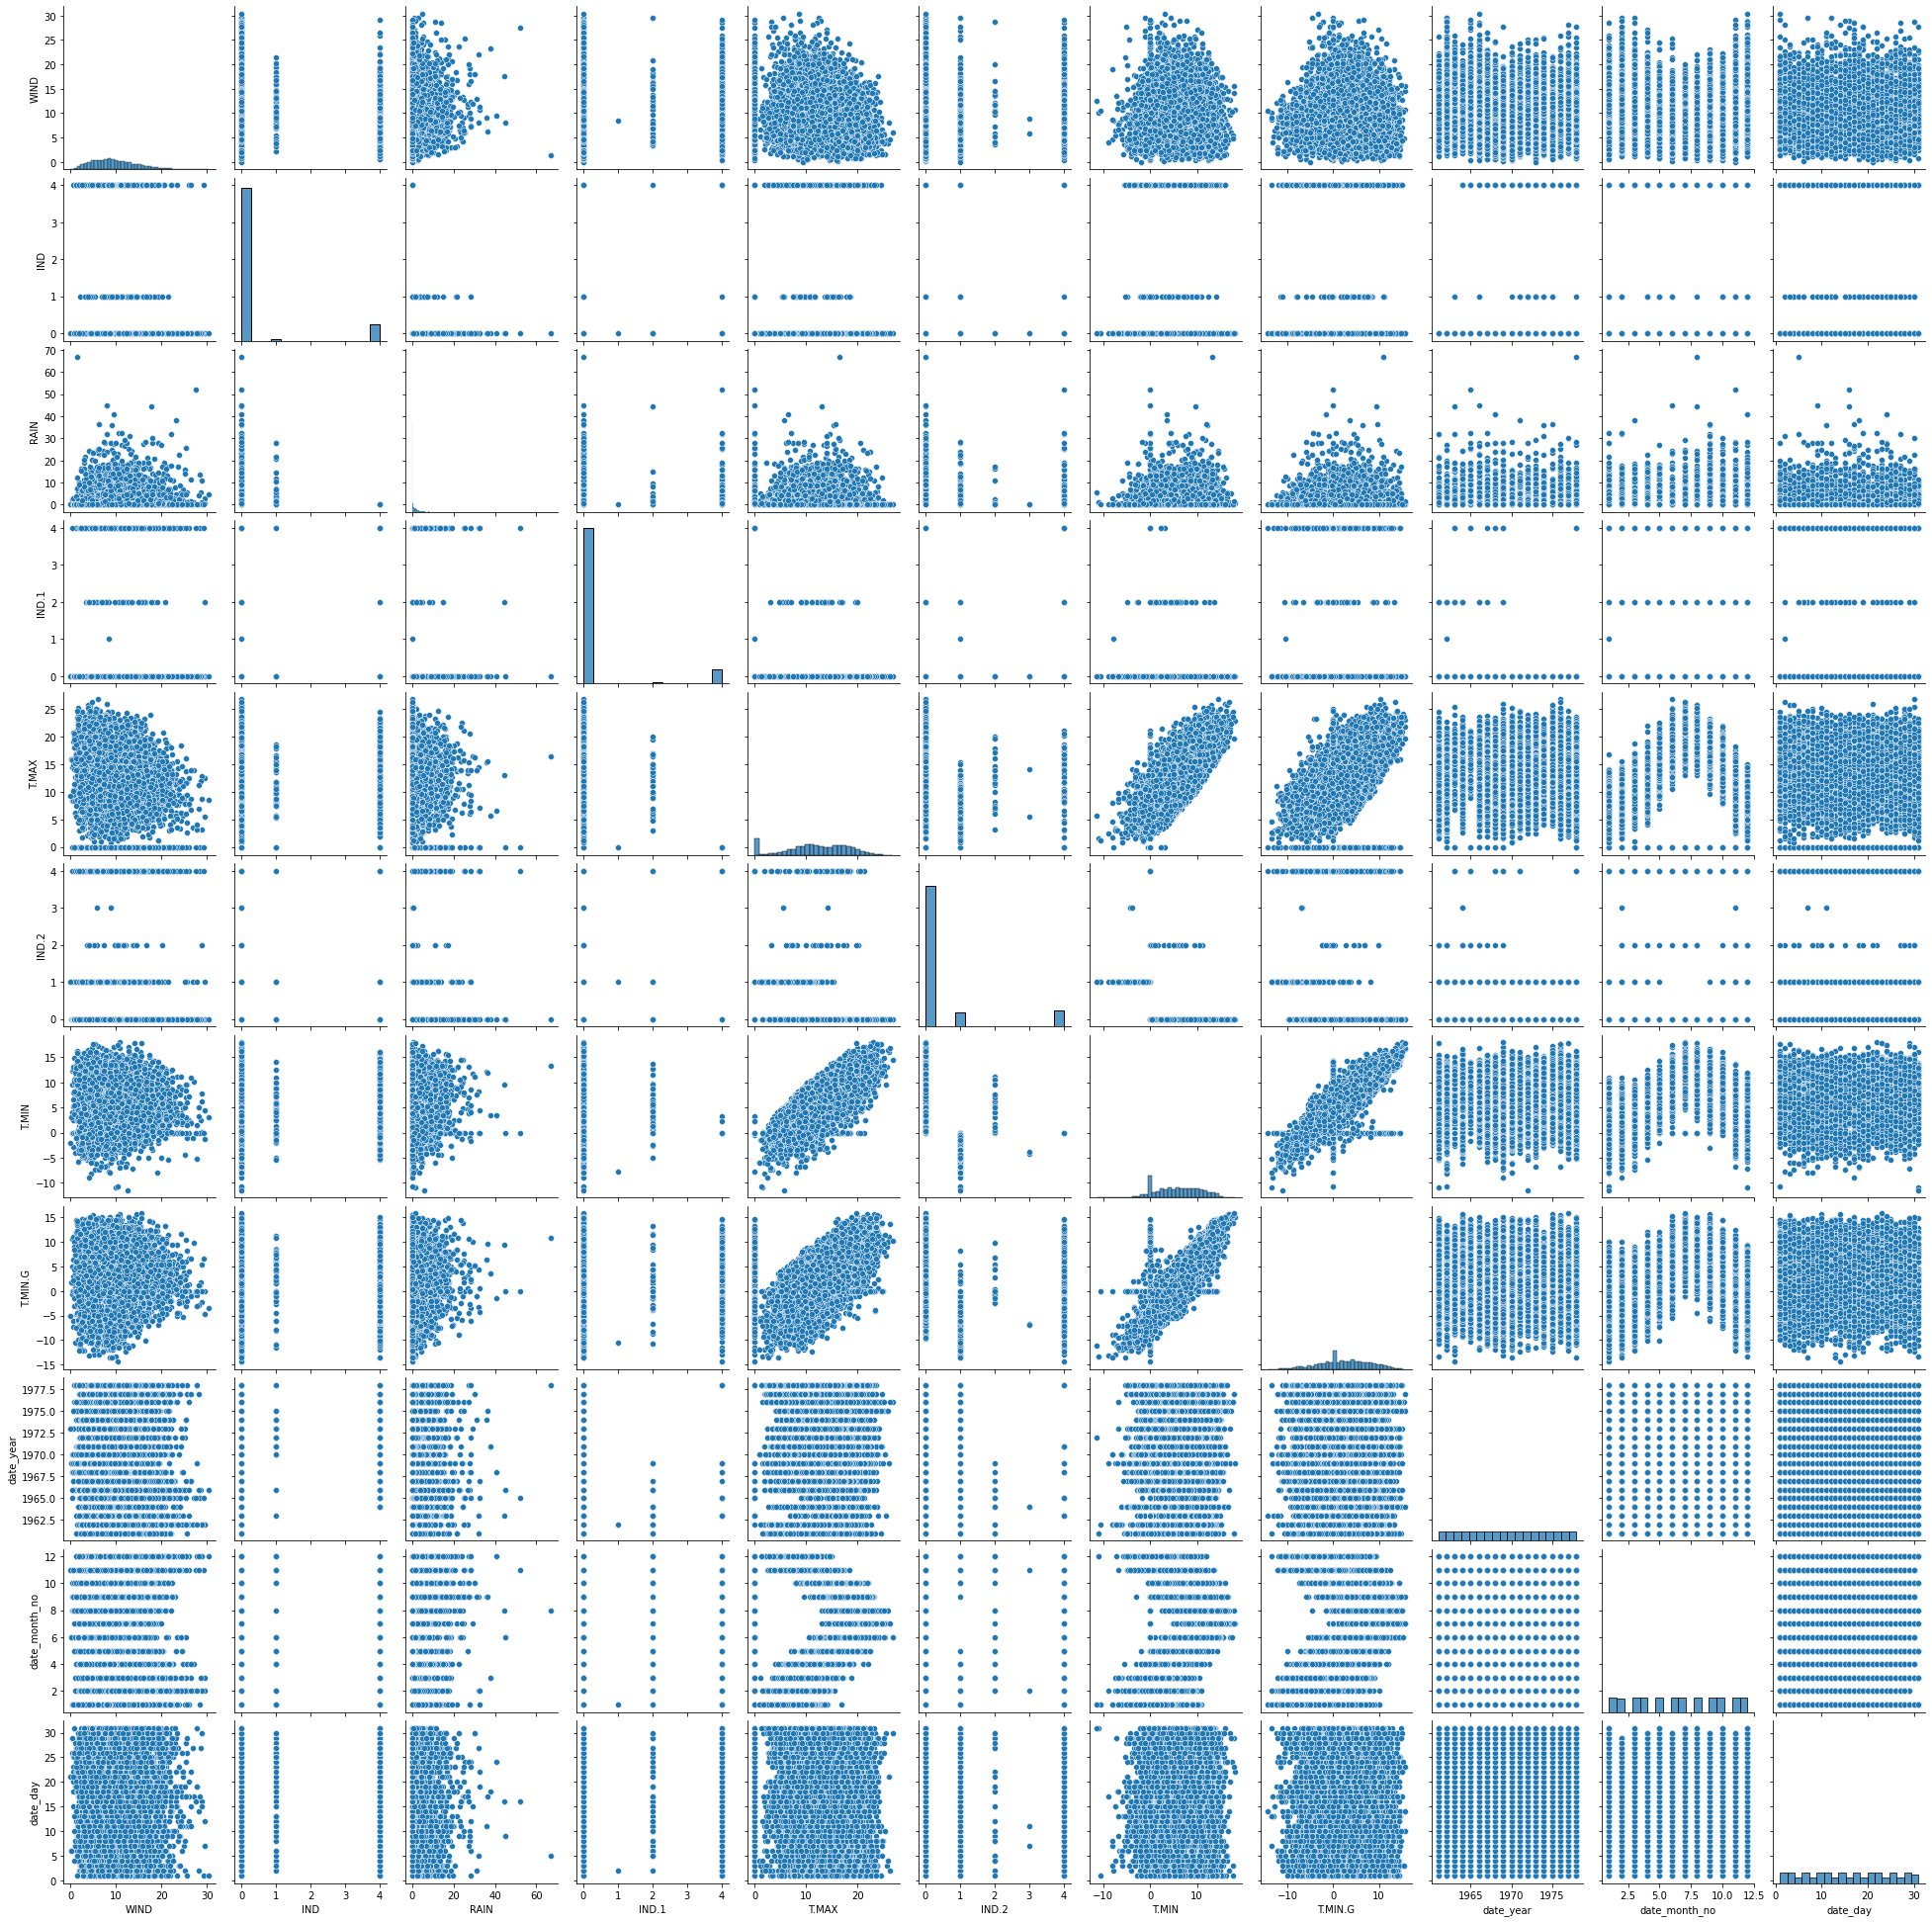

In [ ]:
import seaborn as sns
sns.pairplot(data=df, diag_kind="hist", dropna=True)

(array([ 400., 1279., 1559., 1423.,  950.,  558.,  260.,  100.,   30.,
          15.]),
 array([ 0.   ,  3.037,  6.074,  9.111, 12.148, 15.185, 18.222, 21.259,
        24.296, 27.333, 30.37 ]),
 <BarContainer object of 10 artists>)

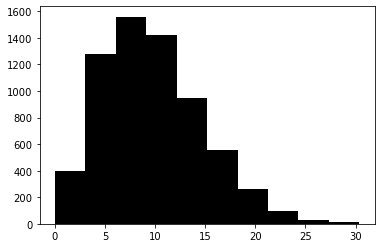

In [ ]:
plt.hist(df["WIND"],color='k')

<AxesSubplot:xlabel='date_month_no', ylabel='WIND'>

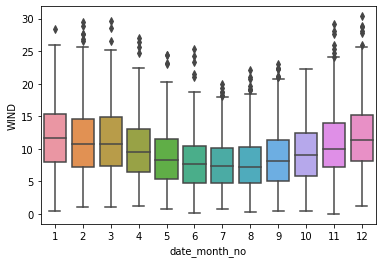

In [ ]:
sns.boxplot(x=df['date_month_no'] ,y=df["WIND"])

In [ ]:
## Split the whole Dataset to Feature & Target
X = df.drop(columns=['WIND'], axis=1)   ## Features
y = df['WIND']   ## target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

## Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (5587, 10)
y_train shape --  (5587,)
X_test shape --  (987, 10)
y_test shape --  (987,)


In [ ]:
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[-0.33060567,  5.74247342,  3.21696867, ..., -0.87313953,
         0.72234824,  0.14040879],
       [-0.33060567, -0.46932071, -0.31741095, ..., -0.68008754,
         0.72234824,  0.36746058],
       [-0.33060567,  0.09988751, -0.31741095, ..., -0.48703556,
        -0.44195313, -0.99485014],
       ...,
       [ 3.07417572, -0.46932071, -0.31741095, ...,  1.05738029,
        -0.73302847,  0.93509005],
       [-0.33060567, -0.24658706, -0.31741095, ...,  1.05738029,
         1.01342358, -1.22190193],
       [-0.33060567, -0.46932071, -0.31741095, ..., -1.25924349,
        -0.44195313, -0.54074657]])

`RandomForestRegressor`

In [ ]:
forest_reg = RandomForestRegressor(n_estimators=400, max_depth=18, max_samples=0.9, random_state=42, n_jobs=-1)
forest_reg.fit(X_train, y_train)
forest_reg.score(X_train, y_train)

0.866241421746478

In [ ]:
y_preds = forest_reg.predict(X_test)
mean_absolute_error(y_test, y_preds)

3.502518855671574

`XGBRegressor`

In [ ]:
## Using the Hero API -- XGBOOST
xgb_reg = XGBRegressor(n_estimators=150, max_depth=8, learning_rate=0.1, subsample=0.8)
xgb_reg.fit(X_train, y_train)
xgb_reg.score(X_train, y_train)


0.9105985130668071

In [ ]:
y_preds = xgb_reg.predict(X_test)
mean_absolute_error(y_test, y_preds)

3.460763022781264